# Introduction

Based on data “bank-additional-full” which recorded bank market data from May 2008 to November 2010, this project will predict whether a client described a team deposit or not. The source of data is UCI Machine Learning Repository. The project incluse two phases. For part1, the report will focus on basic information of this dataset, and then applying different packages and functions to tidy and clean data, in other words, data preprocessing. Next, data visualization will be displayed in this report, call data exploration. For part2, using prepared data to fit model in order to predict if a clent subscribed a team deposit or not. 

# Dataset

The UCI Machine Learning Repository provides dataset, “bank-additional-full” include 41188 observations and 21 variables, this dataset will as working dataset for this project. Another dataset is “bank-additional” which is 10% of examples(4119 observations) of “bank-additional-full”, these examples were selected randomly. Moreover, “bank-additional-names” includes all of decribed information for this dataset. The dataset composite with 20 features and one target feature. In part2, building the classifiers from the training dataset and evaluating performance on test dataset will be completed further.

### Target Feature

The response feature is "y" which is given as:

$y=\begin{cases} 
        yes & \text{if the client described a team deposit} \\
        no & \text{otherwise}
      \end{cases}$  

The target feature include two classes, which means it is a binary classification case. The goal is to predict whether a client decribed a team deposit or not.

### Descriptive Features

The variable description is from text “bank-additional-names”:

#### Feature variables:

##### bank client data:

* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

##### related with the last contact of the current campaign:

* contact: contact communication type (categorical: "cellular","telephone") 
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

##### social and economic context attributes:

* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)     
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: "yes","no").

It seems that all of descriptive features are self-explanatory.

## Data Pre-processing

### Preliminaries

In this project, using packages in Python as below:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from random import sample
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data
df = pd.read_csv("./bank-additional-full.csv")

In [3]:
#Modify column names
column_name = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week","duration", "campagin", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed", "y"]

df.columns = column_name

### Data Cleaning and Transformation

In [4]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campagin,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campagin          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#statistic information for numerical features
df.describe()

,age,duration,campagin,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* There are 5 integer features("age", "duration", "campagin", "pdays", "previous");
* There are 5 numeric features("emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed");
* There are 10 character features("job", "marital", "education", "default", "hosing", "loan", "contact", "month", "day_of_week", "poutcome");
* The target feature "y" has 2 levels which means binary.
* For feature "pdays", both max and median values are 999, it seems that this value represent missing value for this feature.

In [8]:
#percentage of pdays values
df['pdays'].value_counts() / len(df) * 100

999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
19      0.007284
22      0.007284
21      0.004856
26      0.002428
20      0.002428
25      0.002428
27      0.002428
Name: pdays, dtype: float64

* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted);
* Feature "pdays" should be removed, because there are 3959 observations get the value of 999, which means that client was not previously contacted. And the percentage of 999 value for this feature is 96.12% that greater than 60%. Although remove these data might result in data loss, it does not contribute to data exploration.

In [9]:
# Drop feature 'pdays' from bank dataset
df.drop('pdays', axis = 1, inplace = True)

#### Scanning values

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campagin          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

* The missing values were represented by "unknown" in "job", "marital", "education", "default", "housing" and "loan". These feathers are all relate to personal informations, some clients might are sensitive with personal information, so, these values being missing values in data collection section and this is legitimate.

In [11]:
#replace missing values 'unknown' with nan
df.replace('unknown', np.nan, inplace = True)

In [12]:
#calculate percentage of null value for each column
df.isnull().sum() / len(df) * 100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campagin           0.000000
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
y                  0.000000
dtype: float64

# Data Exploration

### Numerical Features

#### Age

Text(0.5,1,'Histogram of Age')

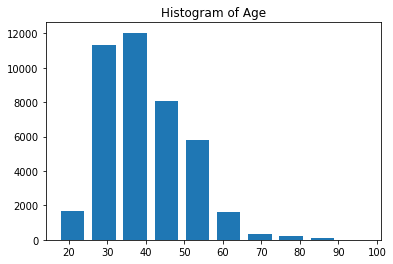

In [13]:
plt.hist(df.age, rwidth=0.75)
plt.title('Histogram of Age')

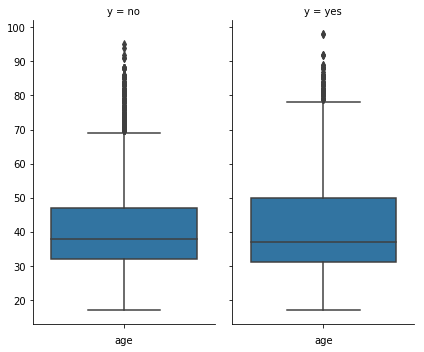

In [14]:
sns.catplot(x = 'age', col = 'y', kind = "box", data = df, orient = "v",aspect = .6)

It shows that majority of individuals are betweent 25 and 50, especially  aged around 40.

#### Last contact duration

In [15]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

C:\Users\Thinkpad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


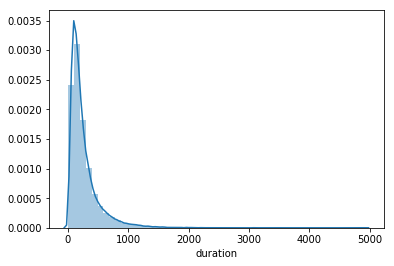

In [16]:
sns.distplot(df['duration'])

The result indicates that most of individuals are contacted between 20 and 150 seconds. And the trend decreased sharply, which might considerable that suitable time of contact is more efficient for asking whether a client subscribe a team deposit or not. For people who do not subscribed a team deposit, the pattern seems different from people who subscribed, the slopes are not as sharp as each other, but, both of them show skewed right distribution.

It seems that there are some outliers in this dataset, checking it with boxplot.

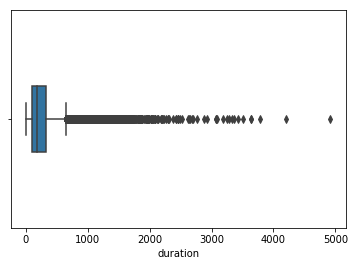

In [17]:
sns.boxplot(df['duration'], width = 0.3)

In [18]:
dur_max_boxplot = 319+1.5*(319-102)

In [19]:
dur_max_boxplot

644.5

In [20]:
df['duration'] = np.where(df['duration']>dur_max_boxplot, np.nan, df['duration'])

In [21]:
df.dropna(subset = ['duration'], inplace = True)

As suspexted before, it seems there are heaps of outliers in this dataset. Tring remove outliers then to see whether it shows better than raw dataset.

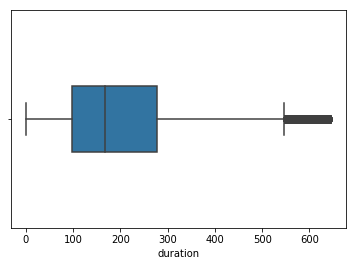

In [22]:
sns.boxplot(df['duration'], width = 0.3)

It shows better than before, not heaps of outliers there. Then, plot histogram to see whether it is also changed or not.

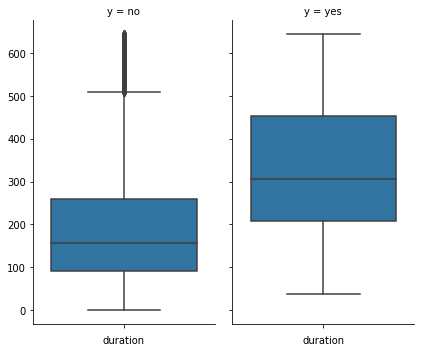

In [23]:
sns.catplot(x = 'duration', col = 'y', kind = "box", data = df, orient = "v",aspect = .6)

For people who do not subscribed a team deposit, the pattern seems different from people who subscribed, boxplot show the different statistical information.

#### Campagin

Text(0.5,1,'Histogram of Campagin')

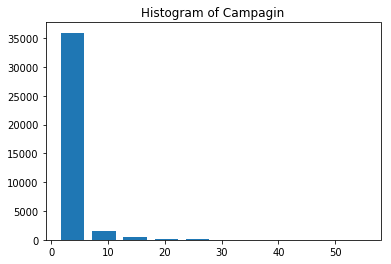

In [24]:
plt.hist(df['campagin'], rwidth = 0.75)
plt.title('Histogram of Campagin')

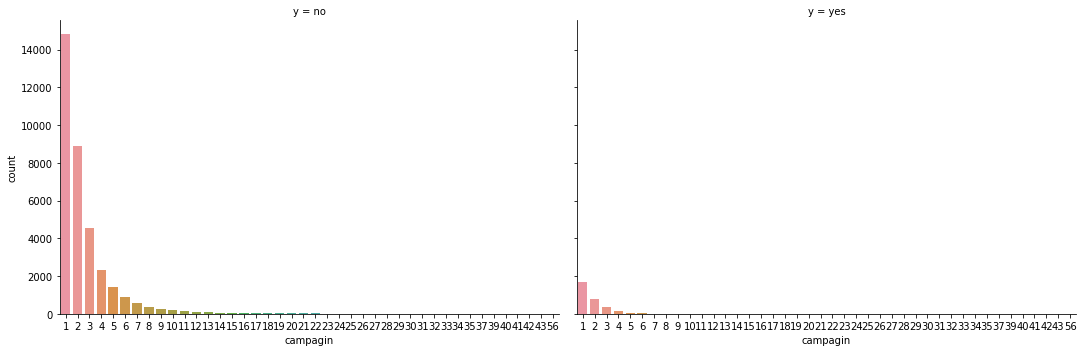

In [25]:
sns.catplot(x = 'campagin', col = 'y', kind = "count", data = df, orient = "v",aspect = 1.5)

It indicates that most of clients be contacted between 1 to 3 times, just few person be contacted greater than 10 times. Both of these plots by target feature show similar pattern. We also could see that they all have long tails on right side that means skewed right distribution.

#### pdays

This feature is romoved from this dataset cause it seems does not contribute to target feature.

#### Previous

Text(0.5,1,'Histogram of Previous')

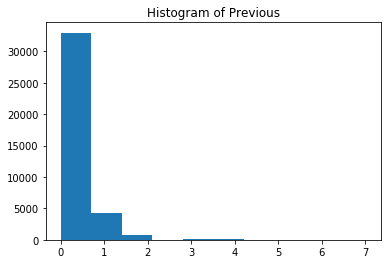

In [26]:
plt.hist(df['previous'])
plt.title('Histogram of Previous')

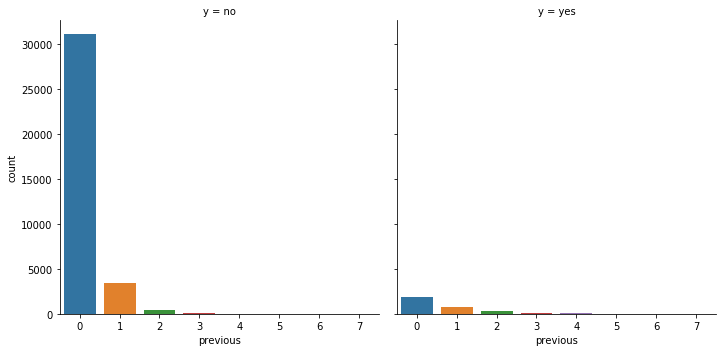

In [27]:
sns.catplot(x = 'previous', col = 'y', kind = "count", data = df, orient = "v")

Due to this feature recorded the number of contact before last contact, and most of data are same, it looks like a discrete distribution, and most of clients get zero for this feature that means they are contacted just once. we also could see that the distribution by target feature are similar for target feature.

#### Employment of variation rate (quarterly indicator)

Text(0.5,1,'Histogram of Emp_var_rate')

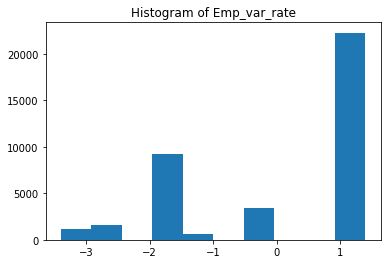

In [28]:
plt.hist(df['emp_var_rate'])
plt.title('Histogram of Emp_var_rate')

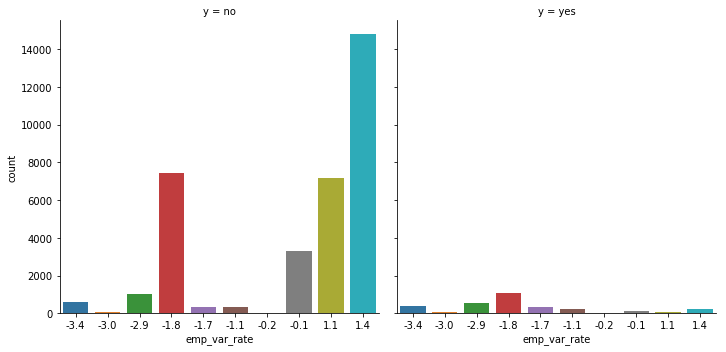

In [29]:
sns.catplot(x = 'emp_var_rate', col = 'y', kind = "count", data = df, orient = "v")

This feature recorded the employment of variation rate, it looks like a discrete distribution, and most of values located between 1 to 1.5. we also could see that the distribution by target feature are similar for value less than 0, while from value greater than 0, the distribution are different.

#### Consumer price index (monthly indicator)

Text(0.5,1,'Histogram of Cons_price_idx')

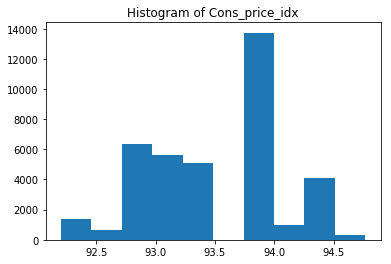

In [30]:
plt.hist(df['cons_price_idx'])
plt.title('Histogram of Cons_price_idx')

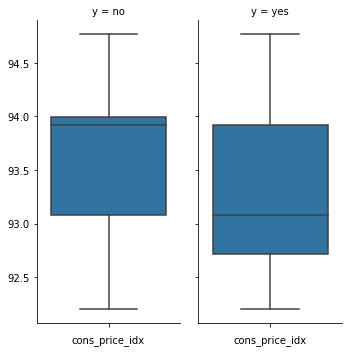

In [31]:
sns.catplot(x = 'cons_price_idx', col = 'y', kind = "box", data = df, orient = "v", aspect = .5)

This feature recorded the consumer price index, most of values located between 93 and 94. In this segment (93 to 94), they show different patterns by target feature, this might be a predictive feature.

#### Consumer confidence index (monthly indicator)

Text(0.5,1,'Histogram of Cons_conf_idx')

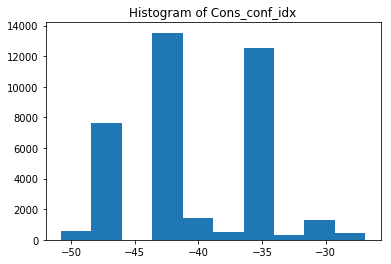

In [32]:
plt.hist(df['cons_conf_idx'])
plt.title('Histogram of Cons_conf_idx')

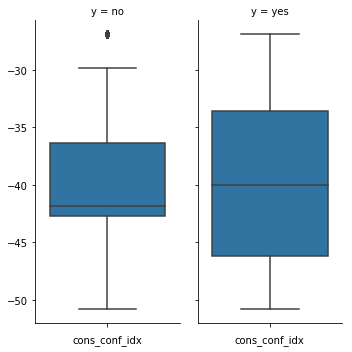

In [33]:
sns.catplot(x = 'cons_conf_idx', col = 'y', kind = "box", data = df, orient = "v", aspect = 0.5)

This feature recorded the consumer confidence index. For people who did not subscribe a team deposit, most of values located between -47 to -35. However, for people who subscribed a team deposit, there is not obvious differences between values.

#### euribor 3 month rate (daily indicator)

Text(0.5,1,'Histogram of Euribor3m')

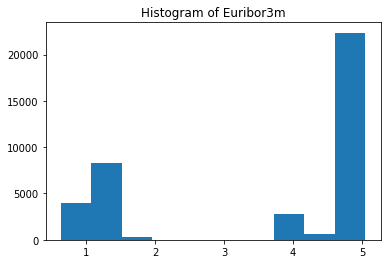

In [34]:
plt.hist(df['euribor3m'])
plt.title('Histogram of Euribor3m')

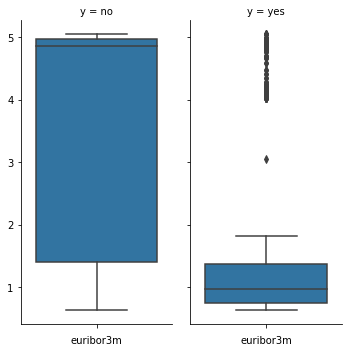

In [35]:
sns.catplot(x = 'euribor3m', col = 'y', kind = "box", data = df, orient = "v", aspect = 0.5)

This feature recorded the eurobor 3 months rate. For people who did not subscribe a team deposit, most of values located around 5. For people who subscribed a team deposit or not, there is an obvious difference between them which could be seen clearly in boxplot.

#### Number of employees (quarterly indicator)

Text(0.5,1,'Histogram of Nr_employed')

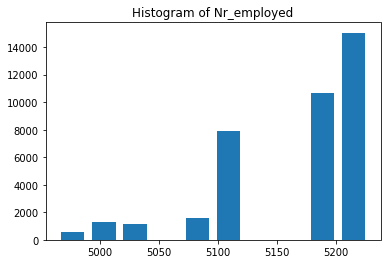

In [36]:
plt.hist(df['nr_employed'], rwidth = .75)
plt.title('Histogram of Nr_employed')

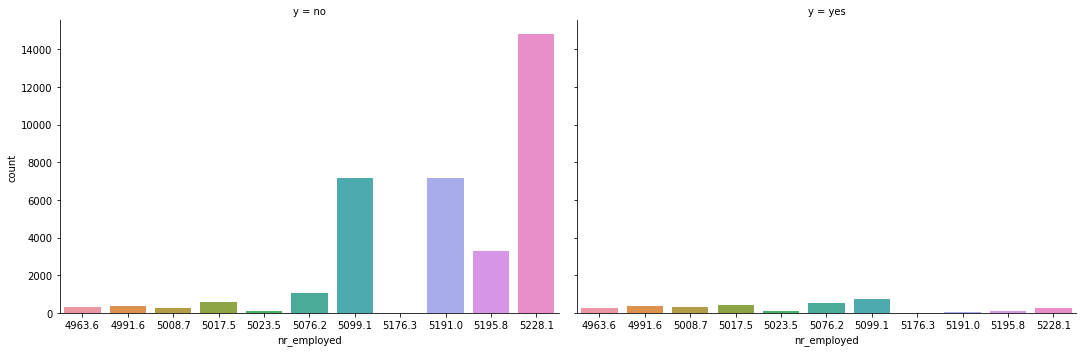

In [37]:
sns.catplot(x = 'nr_employed', col = 'y', kind = "count", data = df, orient = "v", aspect = 1.5)

This feature recorded the number of employees. For people who subscribe a team deposit, most of values located around 5228. In fact, both of these plots are similar except point 5230. This one might be a predictived feature.

### Categorical Features

For categorical data, the missing values in "job", "marital", "education", "default", "housing" and "loan". These feathers are all relate to personal informations, some clients might are sensitive with personal information, so, these values being missing values in data collection section and this is legitimate.
For this project, assign 'other' to instead of missing values in these categorical features.

#### Job

In [38]:
df['job'].value_counts()

admin.           9708
blue-collar      8565
technician       6274
services         3672
management       2702
retired          1599
entrepreneur     1345
self-employed    1302
housemaid         991
unemployed        954
student           803
Name: job, dtype: int64

* Most of clients work as an "admin.", 330 of observation are "unknown", it is just 0.09% of whole dataset. So, combining 'admin.', 'intrepreneur', 'management', 'self-employed' into "administration", combining 'blue-collar', 'housemaid', 'services', 'technician' into "ordinary-employee", combining 'retired', 'unemployed', 'student' and 'unknown' into "others". 

In [39]:
job1 = []

In [40]:
for job in df['job']:
    if job in ['admin.', 'entrepreneur', 'management', 'self-employed']:
        job1.append('adminstration')
    elif job in ['blue-collar', 'housemaid', 'services', 'technician']:
        job1.append('ordinary_employee')
    else:
        job1.append("other")

In [41]:
df['job'] = job1

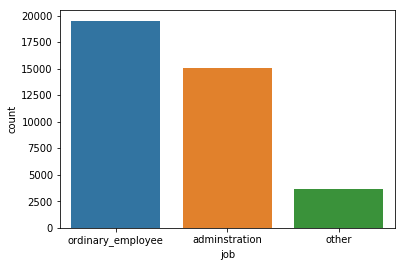

In [42]:
sns.countplot(df['job'])

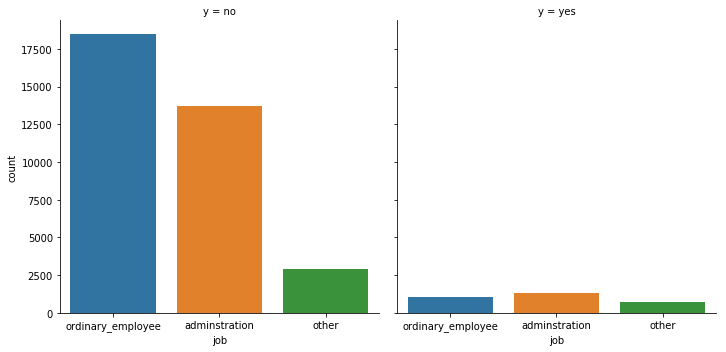

In [43]:
sns.catplot(x = 'job', col = 'y', kind = "count", data = df, orient = "v")

Most of individuals as an ordinary employee in a company. For people who did not subscribed a team deposit, there is not distinct difference between "ordinary_employee" and "administration". For people who subscribed a team deposit, "ordinary_employee" greater than "adminstration" a little bit

#### Marital

In [44]:
df['marital'].fillna('other', inplace = True)

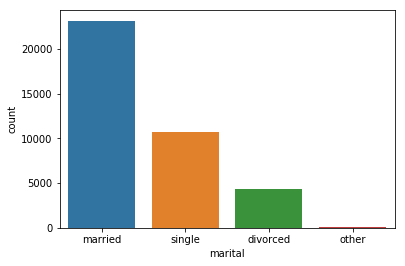

In [45]:
sns.countplot(df['marital'])

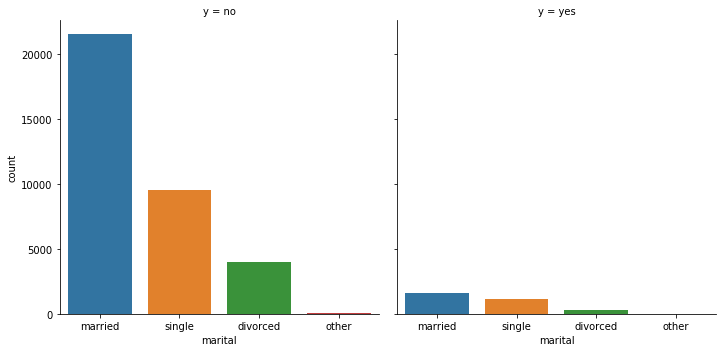

In [46]:
sns.catplot(x = 'marital', col = 'y', kind = "count", data = df, orient = "v")

Most of individuals are married, it could be seen clearly that this class of people much greater than others. For class "other", it looks there is no value shows in both patterns, but, the raw data include value of "other" which means missing value. The result shows here might cause missing value much smaller than others. For people who subscribed a team deposit or not, both of them display same pattern that means they have same distribution.

#### Education

In [47]:
df['education'].value_counts() / len(df)

university.degree      0.295540
high.school            0.230608
basic.9y               0.146684
professional.course    0.127874
basic.4y               0.101635
basic.6y               0.055304
illiterate             0.000419
Name: education, dtype: float64

* Almost half of clients receive education before high school(include high school), followed by "professional.course", and then "university.degree". This feature also associate with feature "age", elder person might get higher level of education. 1731 values are missing for this feature, it occupy 4.2% of whole data. Considering combine levels "basic.4y", "basic.6y", "basic.9y" and "high.school" and "unknown" into one level "pre_uni". 

In [48]:
education1 = []
for education in df['education']:
    if education == 'professional.course':
        education1.append('postgraduate')
    elif education == 'university.degree':
        education1.append('undergraduate')
    else:
        education1.append("pre_uni")

In [49]:
df['education'] = education1

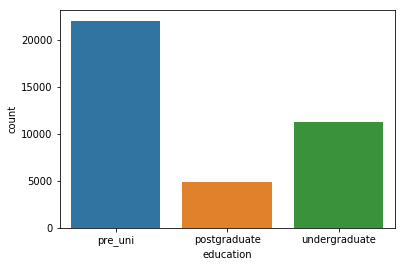

In [50]:
sns.countplot(df['education'])

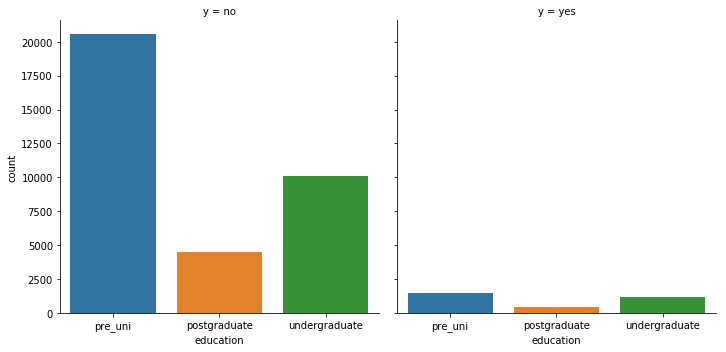

In [51]:
sns.catplot(x = 'education', col = 'y', kind = "count", data = df, orient = "v")

Based on plots, they show that individuals who just accepted "pre_uni" is the highest class for both classes of people subscribed a team deposit or not. This result indicate that most of contacted clients are "pre_uni". Both patterns show the same distribution. 

#### Default

In [52]:
df['default'].fillna('other', inplace = True)

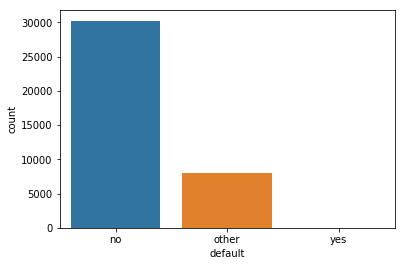

In [53]:
sns.countplot(df['default'])

In [54]:
df['default'].value_counts()

no       30232
other     7990
yes          3
Name: default, dtype: int64

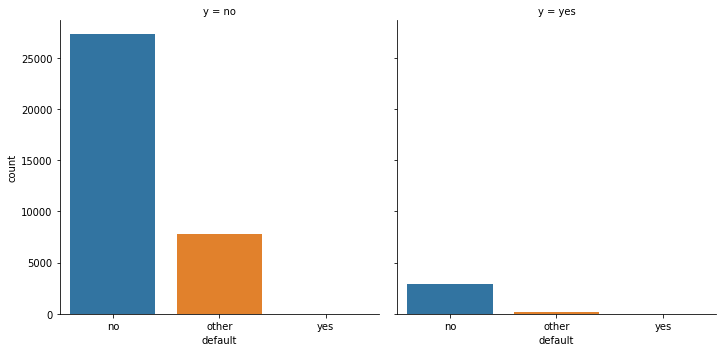

In [55]:
sns.catplot(x = 'default', col = 'y', kind = "count", data = df, orient = "v")

This feature in order to know whether a clent has credit in default or not. Based on the result of plots, no matter they subscribed a team deposit or not, most of people have not credit in default. Both of them by targrt feature show the same distribution. There is an interesting phenomena that few values located in class of "yes", it means that just few people have credit in default.

#### Housing

In [56]:
df['housing'].fillna('other', inplace = True)

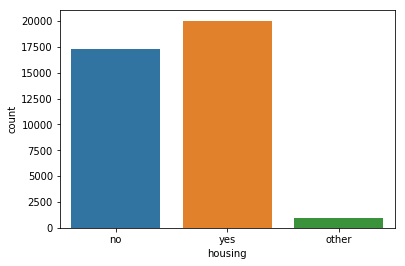

In [57]:
sns.countplot(df['housing'])

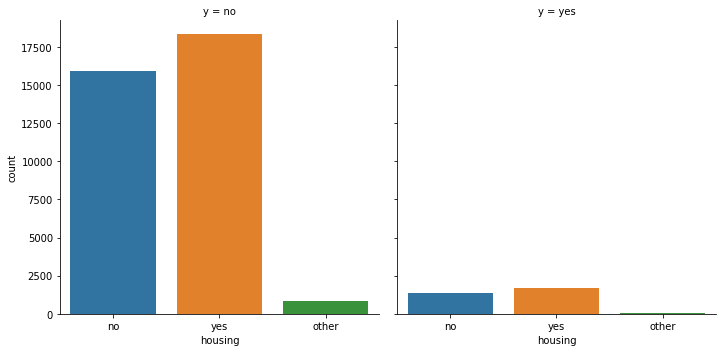

In [58]:
sns.catplot(x = 'housing', col = 'y', kind = "count", data = df, orient = "v")

This feature indicates a client whether has housing load or not. Both of them by target feature are similar. There is not obvious differences between classes "yes" and "no".

#### Loan

In [59]:
df['loan'].fillna('other', inplace = True)

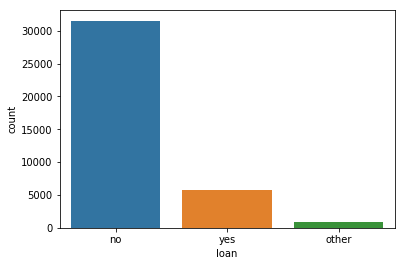

In [60]:
sns.countplot(df['loan'])

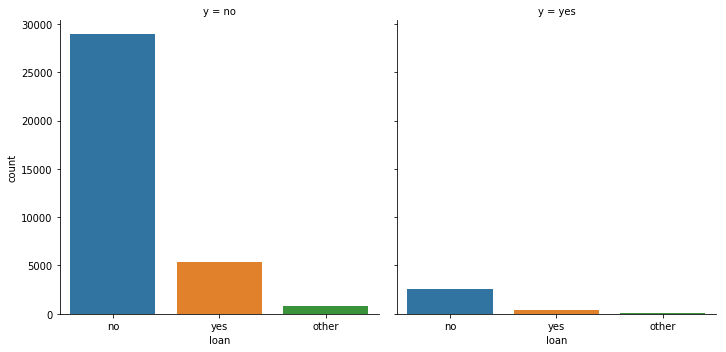

In [61]:
sns.catplot(x = 'loan', col = 'y', kind = "count", data = df, orient = "v")

This feature shows whether a client has personal loan or not. The result show that most of them have not personal loan, no matter if they subscribed a team deposit. Both of them show the same distribution.

#### Contact

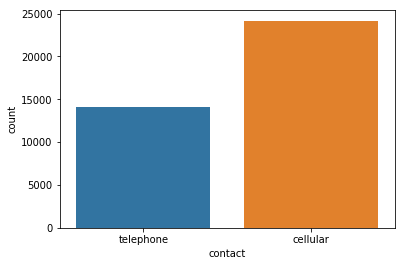

In [62]:
sns.countplot(df['contact'])

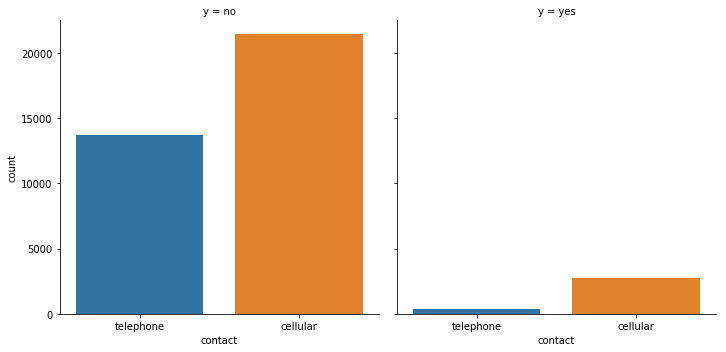

In [63]:
sns.catplot(x = 'contact', col = 'y', kind = "count", data = df, orient = "v")

This feature shows the type of contact commmucation. It shows clearly that people who contacted by "cellular" greater than "telephone".

#### Month

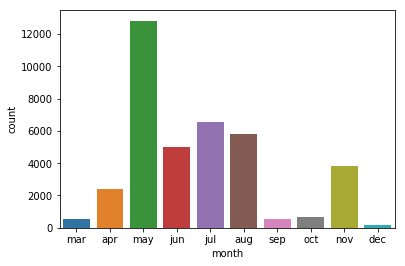

In [64]:
mon_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(df['month'], order = mon_order)

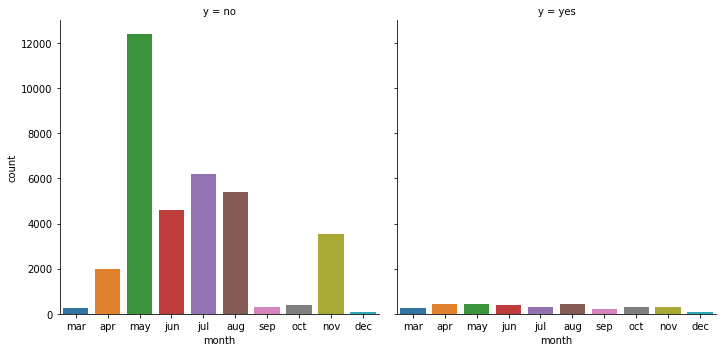

In [65]:
mon_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.catplot(x = 'month', col = 'y', kind = "count", data = df, orient = "v", order = mon_order)

This feature recorded the month of last contact for each client. It could be seen clearly that "may" is the highest month which be contacted, "dec" is the month that be contacted least. For people who subscribed a team deposit, there are not obvious differences between different months except "may" which is a little higer than others.

#### Day of week

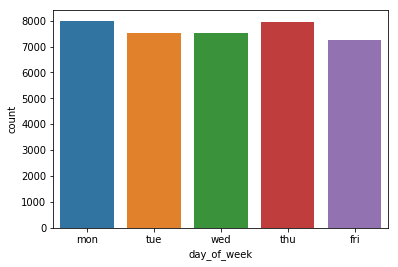

In [66]:
sns.countplot(df['day_of_week'])

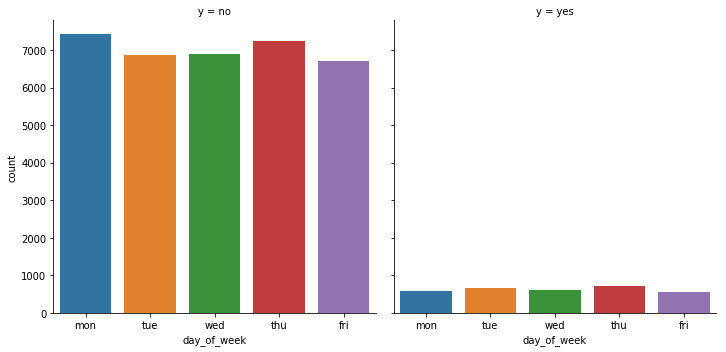

In [67]:
sns.catplot(x = 'day_of_week', col = 'y', kind = "count", data = df, orient = "v")

This feature indicates that a client is contacted on which day of a week. The result show that the number of contact for each day is similar in weekdays, it seems be distributed randomly.

#### Poutcome

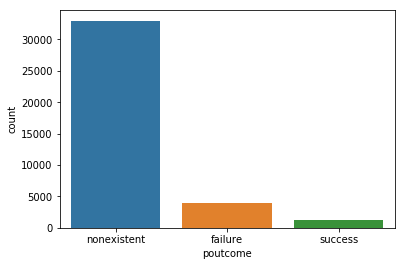

In [68]:
sns.countplot(df['poutcome'])

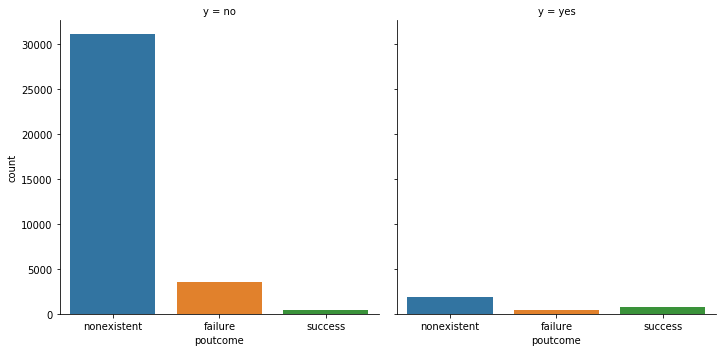

In [69]:
sns.catplot(x = 'poutcome', col = 'y', kind = "count", data = df, orient = "v")

This feature indicates that outcome of previous marketing campaign. The class of "nonexistent" higher than others obviously, it means that most of clients are not attend a marketing campaign before. Both of them by target feature are similar.

In [70]:
df.to_csv('bank_clean.csv', index=False)

## Modeling

### Dummy and standardization

In [71]:
df = pd.read_csv('./bank_clean.csv')
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campagin,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,ordinary_employee,married,pre_uni,no,no,no,telephone,may,mon,261.0,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,ordinary_employee,married,pre_uni,other,no,no,telephone,may,mon,149.0,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
df_features = df.drop('y', axis = 1)

In [73]:
df_label = df[['y']]

In [74]:
df_features_category = df_features.select_dtypes(exclude=[np.number])
df_features_numeric = df_features.select_dtypes(include=[np.number])
df_features_numeric.head(3)

,age,duration,campagin,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261.0,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149.0,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226.0,1,0,1.1,93.994,-36.4,4.857,5191.0


In [75]:
#Dummy categorical data
for cate in df_features_category:
    df_one = pd.get_dummies(df_features[cate], prefix = cate)
    df_features.drop([cate], axis = 1, inplace = True)
    df_features = pd.concat((df_features, df_one), axis = 1)

df_features.shape

(38225, 48)

In [76]:
#Standardization numerical data
scaler = preprocessing.StandardScaler()
df_scale = scaler.fit_transform(df_features)
df_features_scale = pd.DataFrame(df_scale, index = df_features.index, columns = df_features.columns)
df_features_scale.head(2)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,duration,campagin,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_adminstration,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.529988,0.409496,-0.56064,-0.350216,0.647802,0.723987,0.880956,0.711926,0.33116,-0.806167,...,-0.132652,-0.116863,-0.484044,1.94497,-0.512113,-0.495336,-0.49423,-0.341629,0.398705,-0.183714
1,1.625909,-0.384744,-0.56064,-0.350216,0.647802,0.723987,0.880956,0.711926,0.33116,-0.806167,...,-0.132652,-0.116863,-0.484044,1.94497,-0.512113,-0.495336,-0.49423,-0.341629,0.398705,-0.183714


### Split data

In [77]:
#split data on original dataset
x_train,x_test,y_train,y_test = train_test_split(df_features, df_label, test_size = .3, random_state = 2019)
#split data on standardized dataset
x1_train,x1_test,y1_train,y1_test = train_test_split(df_features_scale, df_label, test_size = 0.3, random_state = 2019)

### K-Nearest Neighbour

#### original data

In [78]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred_knn = model.predict(x_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [79]:
#Accuracy classification score 
accuracy_score(y_test, y_pred_knn)

0.9282350889431461

In [80]:
#Compute the balanced accuracy, It is defined as the average of recall obtained on each class.
balanced_accuracy_score(y_test, y_pred_knn)

0.6992457026187981

In [81]:
#Compute confusion matrix to evaluate the accuracy of a classification
confusion_matrix(y_test, y_pred_knn)/confusion_matrix(y_test, y_pred_knn).sum(axis=1)

array([[0.97148811, 0.33040615],
       [0.04944587, 0.42700329]])

In [82]:
y_pred_prob_knn = model.predict_proba(x_test)[::,1]
y_score = roc_auc_score(y_test, y_pred_prob_knn)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn, pos_label='yes')

#### Standardized data

In [83]:
model.fit(x1_train, y1_train)
y1_pred_knn = model.predict(x1_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [84]:
accuracy_score(y1_test, y1_pred_knn)

0.925531914893617

In [85]:
balanced_accuracy_score(y1_test, y1_pred_knn)

0.6757121213397305

In [86]:
confusion_matrix(y1_test, y1_pred_knn)/confusion_matrix(y1_test, y1_pred_knn).sum(axis=1)

array([[0.97271952, 0.31613611],
       [0.05361372, 0.37870472]])

In [88]:
y1_pred_prob_knn = model.predict_proba(x1_test)[::,1]
y1_score = roc_auc_score(y1_test, y1_pred_prob_knn)
fpr1, tpr1, _1 = roc_curve(y1_test, y1_pred_prob_knn, pos_label='yes')

#### ROC (Receiver Operating Characteristic) Curve

Text(0,0.5,'True Positive Rate')

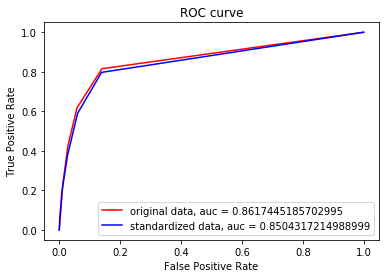

In [89]:
plt.plot(fpr, tpr, label = 'original data, auc = ' + str(y_score), color = 'red')
plt.plot(fpr1, tpr1, label = 'standardized data, auc = ' + str(y1_score), color = 'blue')
plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Logistic Regression

#### Original data

In [90]:
lr = LogisticRegression(C = 1.0, penalty = 'l2', multi_class='ovr')
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
accuracy_score(y_test, y_pred_lr)

0.9348622253226369

In [92]:
balanced_accuracy_score(y_test, y_pred_lr)

0.6988333262108463

In [93]:
confusion_matrix(y_test, y_pred_lr)/confusion_matrix(y_test, y_pred_lr).sum(axis=1)

array([[0.97944492, 0.23819978],
       [0.05020366, 0.41822173]])

In [94]:
y_pred_prob_lr = lr.predict_proba(x_test)[::, 1]
y_score = roc_auc_score(y_test, y_pred_prob_lr)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr, pos_label='yes')

#### Standardized Data

In [95]:
lr.fit(x1_train, y1_train)
y1_pred_lr = lr.predict(x1_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
accuracy_score(y1_test, y1_pred_lr)

0.9373038018835019

In [97]:
balanced_accuracy_score(y1_test, y1_pred_lr)

0.7106906556192212

In [98]:
confusion_matrix(y1_test, y1_pred_lr)/confusion_matrix(y1_test, y1_pred_lr).sum(axis=1)

array([[0.98010799, 0.23051592],
       [0.04821445, 0.44127333]])

In [99]:
y1_pred_prob_lr = lr.predict_proba(x1_test)[::, 1]
y1_score = roc_auc_score(y1_test, y1_pred_prob_lr)
fpr1, tpr1, _1 = roc_curve(y1_test, y1_pred_prob_lr, pos_label='yes')

#### ROC (Receiver Operating Characteristic) Curve

Text(0,0.5,'True Positive Rate')

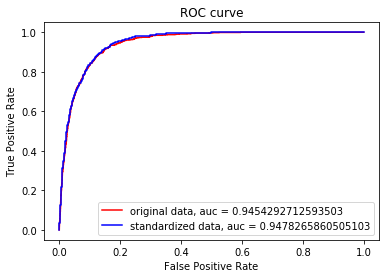

In [100]:
plt.plot(fpr, tpr, label = 'original data, auc = ' + str(y_score), color = 'red')
plt.plot(fpr1, tpr1, label = 'standardized data, auc = ' + str(y1_score), color = 'blue')
plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Save dummy and standardized dataset

In [101]:
#dummy data
df_merge = pd.concat([df_features,df_label], axis = 1)
df_merge.to_csv('df_merge.csv', index = False)

In [102]:
#standardized data
df_scale_merge = pd.concat([df_features_scale,df_label], axis = 1)
df_scale_merge.to_csv('df_scale_merge.csv', index = False)

### Manipulate data to balanced dataset

In [103]:
df_merge = pd.read_csv('./df_merge.csv')
df_merge['y'].value_counts()

no     35111
yes     3114
Name: y, dtype: int64

In [104]:
df_merge_y_no = df_merge[df_merge['y'] == 'yes']

df_merge_y_yes = df_merge[df_merge['y'] == 'no'].sample(3114, random_state = 2019)

#build balanced data
df_merge_balance = pd.concat([df_merge_y_yes, df_merge_y_no], axis = 0)

In [105]:
#split features and label data
df_merge_balance_x = df_merge_balance.drop('y', axis = 1)

df_merge_balance_y = df_merge_balance['y']

### Split data on balanced data

In [106]:
x_train, x_test, y_train, y_test = train_test_split(df_merge_balance_x, df_merge_balance_y, test_size = .3, random_state = 2019)

### Logistic Regression

In [107]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
accuracy_score(y_test, y_pred)

0.875334403424291

In [109]:
balanced_accuracy_score(y_test, y_pred)

0.8756587547299621

In [110]:
confusion_matrix(y_test, y_pred)/confusion_matrix(y_test, y_pred).sum(axis=1)

array([[0.86687307, 0.14333333],
       [0.10732714, 0.88444444]])

In [111]:
y_pred_prob_lr_bal = lr.predict_proba(x_test)[::, 1]
y_score_lr = roc_auc_score(y_test, y_pred_prob_lr_bal)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr_bal, pos_label='yes')

### Random Forest

In [112]:
rf = RandomForestClassifier()

In [113]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

C:\Users\Thinkpad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
accuracy_score(y_test, y_pred_rf)

0.8726591760299626

In [115]:
balanced_accuracy_score(y_test, y_pred_rf)

0.8719315445476437

In [116]:
confusion_matrix(y_test, y_pred_rf)/confusion_matrix(y_test, y_pred_rf).sum(axis=1)

array([[0.89164087, 0.11666667],
       [0.1372549 , 0.85222222]])

In [117]:
y_pred_prob_rf_bal = rf.predict_proba(x_test)[::, 1]
y_score_rf = roc_auc_score(y_test, y_pred_prob_rf_bal)
fpr1, tpr1, _1 = roc_curve(y_test, y_pred_prob_rf_bal, pos_label='yes')

### ROC (Receiver Operating Characteristic) Curve


Text(0,0.5,'True Positive Rate')

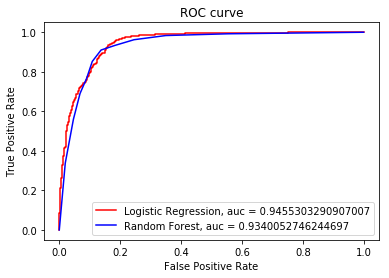

In [118]:
plt.plot(fpr, tpr, label = 'Logistic Regression, auc = ' + str(y_score_lr), color = 'red')
plt.plot(fpr1, tpr1, label = 'Random Forest, auc = ' + str(y_score_rf), color = 'blue')
plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Conclusion

Among classifier K Nearest Neighbors(KNN), Random Forest(RF) and Logistic Regression(LR), whether a client will subscribe a team deposit, the LR produces the best performance on both original and artificial balanced dataset. KNN and LR show good accuracy score on original dataset, because the original dataset is imbalanced, and they could do good job on people who did not subscribe a team deposit. However, for people who subscribe a team deposit, they show bad performance. Doing prediction on both original and standardized dataset shows that there is not obvious differences between them, although KNN always show better result for same scale dataset in theory. All of them training on same dataset (70% of population), and evaluated on same test data. In the process, we use all of features for modeling cause there are ot too many features in this dataset. Then, rely on confusion matrix, ROC and AUC to evaluate the performance for different learners and models. In the future works, considering other methods to overcome imbalanced dataset, applying tune-fining to decide optimal hyperparameter value, using other packages to select features could be done to improve performance.